In [18]:
import numpy as np
import os
import pickle
import matplotlib.pylab as plt

In [19]:
good_runs = [304125, 302263, 302597, 300157, 304508]
bad_runs =  [301480, 302566, 299592, 305588, 297659, 306425]

# ECAL Bad: 306425, 302566, 301480, 297659
# HCAL Bad: 305588, 299592

In [20]:
train_run = 304125
test_run = 302597
val_run = 302263
os.chdir("../../../data")

paths = []

os.chdir(str(train_run))
paths.append("../../../data/" + str(train_run) + "/")
command = os.popen('ls')
ls = command.read()
f = ls.split("\n")
train_files = [x for x in f if len(x) != 0 and ".npy" in x and "HLT" in x]
os.chdir("../")

os.chdir(str(test_run))
paths.append("../../../data/" + str(test_run) + "/")
command = os.popen('ls')
ls = command.read()
f = ls.split("\n")
test_files = [x for x in f if len(x) != 0 and ".npy" in x and x in train_files]
os.chdir("../")

train_files = [x for x in train_files if x in test_files]

os.chdir(str(val_run))
paths.append("../../../data/" + str(val_run) + "/")
command = os.popen('ls')
ls = command.read()
f = ls.split("\n")
val_files = [x for x in f if len(x) != 0 and ".npy" in x and x in train_files]
os.chdir("../")

os.chdir("../SWAN_projects/ml_dqm/ml_dqm")
#print(val_files)

filenames = ['HLT_AK8PFJetFwd260.npy','HLT_Ele200_CaloIdVT_GsfTrkIdT.npy',
             'HLT_Photon120.npy','HLT_Mu20.npy']
numfiles = 4

In [21]:
train_data = []
test_data = []
val_data = []
for f in filenames:
    train_data.append(np.load(paths[0] + f))
    test_data.append(np.load(paths[1] + f))
    val_data.append(np.load(paths[2] + f))
train_data = [x for x in train_data if len(x[0]) != 0]
test_data = [x for x in test_data if len(x[0]) != 0]
val_data = [x for x in val_data if len(x[0]) != 0]

## Training

In [22]:
train_rates = []
train_pileup = []
for d in train_data[0:numfiles]:
    train_rates.append(d[1])
    train_pileup.append(d[0])

c = set(train_pileup[0])
for p in range(1,len(train_pileup)):
    temp = set(train_pileup[p])
    c = c.intersection(temp)
    #print(len(c.intersection(temp)))
c = list(c)
c = [x for x in c if x >= 18]
train_samples = np.zeros([len(c),numfiles])
train_samplesP = np.zeros([len(c),numfiles+1])

for p in range(0,len(train_pileup)):
    for q in range(0,len(train_pileup[p])):
        for k in range(0,len(c)):
            if train_pileup[p][q] == c[k]:
                train_samplesP[k,0] = c[k]
                train_samplesP[k,p+1] = train_rates[p][q]
                train_samples[k,p] = train_rates[p][q]
                break
                
for i in range(0,len(train_samples)):
    raw = sum(train_samples[i,:])
    rawP = sum(train_samplesP[i,:])
    for j in range(0,numfiles):
        train_samples[i,j] = train_samples[i,j]/raw
    for j in range(0,numfiles+1):
        train_samplesP[i,j] = train_samplesP[i,j]/rawP

Xtrain = train_samples
XtrainP = train_samplesP

## Test

In [23]:
test_rates = []
test_pileup = []
for d in test_data[0:numfiles]:
    test_rates.append(d[1])
    test_pileup.append(d[0])

c = set(test_pileup[0])
for p in range(1,len(test_pileup)):
    temp = set(test_pileup[p])
    c = c.intersection(temp)
    #print(len(c.intersection(temp)))
c = list(c)
c = [x for x in c if x >= 18]

test_samples = np.zeros([len(c),numfiles])
test_samplesP = np.zeros([len(c),numfiles+1])
    
for p in range(0,len(test_pileup)):
    for q in range(0,len(test_pileup[p])):
        #print(pileup[p][q],c[k])
        for k in range(0,len(c)):
            if test_pileup[p][q] == c[k]:
                test_samplesP[k,0] = c[k]
                test_samplesP[k,p+1] = test_rates[p][q]
                test_samples[k,p] = test_rates[p][q]
                break

for i in range(0,len(test_samples)):
    raw = sum(test_samples[i,:])
    rawP = sum(test_samplesP[i,:])
    for j in range(0,numfiles):
        test_samples[i,j] = test_samples[i,j]/raw
    for j in range(0,numfiles+1):
        test_samplesP[i,j] = test_samplesP[i,j]/rawP

Xtest = test_samples
XtestP = test_samplesP

print(Xtest)

[[  1.04541860e-02   8.78502985e-04   4.77905644e-02   9.40876747e-01]
 [  9.50810092e-03   1.06723581e-03   7.25720379e-02   9.16852625e-01]
 [  1.25683509e-02   8.97739332e-04   6.10462792e-02   9.25487631e-01]
 ..., 
 [  1.51574804e-02   1.18110246e-03   5.35433095e-02   9.30118108e-01]
 [  1.11856828e-02   7.45712139e-04   4.84712900e-02   9.39597315e-01]
 [  1.27272724e-02   1.36363638e-03   6.54545442e-02   9.20454547e-01]]


## Validation

In [24]:
val_rates = []
val_pileup = []
for d in val_data[0:numfiles]:
    val_rates.append(d[1])
    val_pileup.append(d[0])

c = set(val_pileup[0])
for p in range(1,len(val_pileup)):
    temp = set(val_pileup[p])
    c = c.intersection(temp)
    #print(len(c.intersection(temp)))
c = list(c)
c = [x for x in c if x >= 18]

val_samples = np.zeros([len(c),numfiles])
val_samplesP = np.zeros([len(c),numfiles+1])

for p in range(0,len(val_pileup)):
    for q in range(0,len(val_pileup[p])):
        #print(pileup[p][q],c[k])
        for k in range(0,len(c)):
            if val_pileup[p][q] == c[k]:
                val_samplesP[k,0] = c[k]
                val_samplesP[k,p+1] = val_rates[p][q]
                val_samples[k,p] = val_rates[p][q]
                break
                
for i in range(0,len(val_samples)):
    raw = sum(val_samples[i,:])
    rawP = sum(val_samplesP[i,:])
    for j in range(0,numfiles):
        val_samples[i,j] = val_samples[i,j]/raw
    for j in range(0,numfiles+1):
        val_samplesP[i,j] = val_samplesP[i,j]/rawP
                                
Xval = val_samples
XvalP = val_samplesP

In [38]:
dataPileup = {'train': XtrainP, 'test': XtestP, 'validation': XvalP}
data = {'train': Xtrain, 'test': Xtest, 'validation': Xval}

print(Xtest)

[[  1.04541860e-02   8.78502985e-04   4.77905644e-02   9.40876747e-01]
 [  9.50810092e-03   1.06723581e-03   7.25720379e-02   9.16852625e-01]
 [  1.25683509e-02   8.97739332e-04   6.10462792e-02   9.25487631e-01]
 ..., 
 [  1.51574804e-02   1.18110246e-03   5.35433095e-02   9.30118108e-01]
 [  1.11856828e-02   7.45712139e-04   4.84712900e-02   9.39597315e-01]
 [  1.27272724e-02   1.36363638e-03   6.54545442e-02   9.20454547e-01]]


In [26]:
with open('dataPileup.pickle', 'wb') as handle:
    pickle.dump(dataPileup, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('data.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

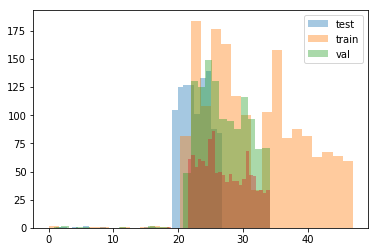

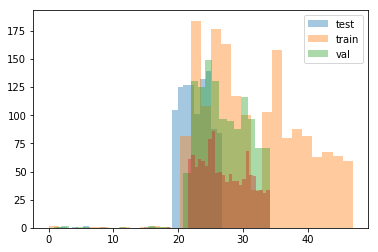

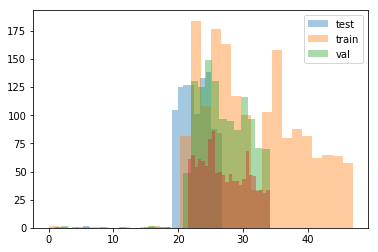

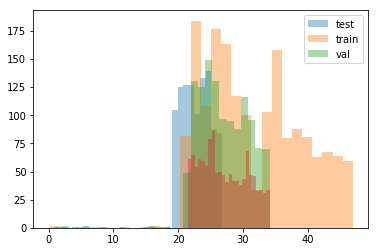

In [27]:
for i in range(len(test_pileup)):
    plt.figure()
    plt.hist(test_pileup[i],bins=30,label='test',alpha=.4)
    plt.hist(train_pileup[i],bins=30,label='train',alpha=.4)
    plt.hist(val_pileup[i],bins=30,label='val',alpha=.4)
    plt.hist(c,bins=30,alpha=.4)
    plt.legend()

plt.show()


## Fake bad data

### One bad rate

In [28]:
b = np.ones(XtestP.shape)
rows = XtestP.shape[0]
cols = XtestP.shape[1]

for i in range(rows):
    for j in range(cols):
        b[i,j] = XtestP[i,j]
        if j == 4:
            b[i,j]*=10
            
baddata = {'train': Xtrain, 'test': b, 'validation': Xval}
with open('badratePileup.pickle', 'wb') as handle:
    pickle.dump(baddata, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [29]:
b = np.ones(Xtest.shape)
rows = Xtest.shape[0]
cols = Xtest.shape[1]

print(rows,cols)

for i in range(rows):
    for j in range(cols):
        b[i,j] = Xtest[i,j]
        if j == 3:
            b[i,j]*=10
            
baddata = {'train': Xtrain, 'test': b, 'validation': Xval}
with open('badrate.pickle', 'wb') as handle:
    pickle.dump(baddata, handle, protocol=pickle.HIGHEST_PROTOCOL)

(1027, 4)


### All bad rates

In [30]:
c = np.ones(Xtest.shape)
rows = Xtest.shape[0]
cols = Xtest.shape[1]

for i in range(rows):
    for j in range(cols):
        c[i,j] = Xtest[i,j]*7
            
allbaddata = {'train': Xtrain, 'test': c, 'validation': Xval}
with open('allbadrates.pickle', 'wb') as handle:
    pickle.dump(allbaddata, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [31]:
c = np.ones(XtestP.shape)
rows = XtestP.shape[0]
cols = XtestP.shape[1]

for i in range(rows):
    for j in range(cols):
        if i != 0:
            c[i,j] = XtestP[i,j]*5
            
allbaddata = {'train': Xtrain, 'test': c, 'validation': Xval}
with open('allbadratesPileup.pickle', 'wb') as handle:
    pickle.dump(allbaddata, handle, protocol=pickle.HIGHEST_PROTOCOL)

## All Files

In [32]:
os.chdir("../../../new_data")

files = good_runs + bad_runs

all_files = []
paths = []
for f in range(len(files)):
    if f == 0:
        os.chdir(str(files[f]))
        paths.append("../../../new_data/" + str(files[f]) + "/")
        command = os.popen('ls')
        ls = command.read()
        fil = ls.split("\n")
        all_files = set([x for x in fil if len(x) != 0 and ".npy" in x and "HLT" in x])
        os.chdir("../")
    else:
        os.chdir(str(files[f]))
        paths.append("../../../new_data/" + str(files[f]) + "/")
        command = os.popen('ls')
        ls = command.read()
        fi = ls.split("\n")
        temp = set([x for x in fi if len(x) != 0 and ".npy" in x and "HLT" in x])
        all_files = all_files.intersection(temp)
        os.chdir("../")

os.chdir("../SWAN_projects/ml_dqm/ml_dqm")
numfiles = len(all_files)
all_files = list(all_files)

In [33]:
#print(all_files)

all_files = ['HLT_PFMET120_PFMHT120_IDTight.npy','HLT_IsoMu20.npy','HLT_Photon90.npy','HLT_PFJet60.npy']
numfiles = 4
gdata = []
bdata = []
for run in range(len(good_runs)):
    gdata.append([])
    for f in all_files:
        gdata[run].append(np.load('../../../new_data/' + str(good_runs[run]) + '/' + f))
    gdata[run] = [x for x in gdata[run] if len(x[0]) != 0]
for run in range(len(bad_runs)):
    bdata.append([])
    for f in all_files:
        bdata[run].append(np.load('../../../new_data/' + str(bad_runs[run]) + '/' + f))
    bdata[run] = [x for x in bdata[run] if len(x[0]) != 0]

In [34]:
good_data = {}
good_runs = [304125, 302263, 302597, 300157, 304508]
ranges = [[1,1769],[1,1250],[1,1054],[9,1107],[1,1324]]
for r in range(len(good_runs)):
    rates = []
    pileup = []
    ls = []
    good_data.update({str(good_runs[r]) : {}})
    for d in range(len(gdata[r])):
        rates.append(gdata[r][d][1][ranges[d][0]:ranges[d][1]])
        pileup.append(gdata[r][d][0][ranges[d][0]:ranges[d][1]])
        ls.append(gdata[r][d][5][ranges[d][0]:ranges[d][1]])
    
    c = set(ls[0])
    for p in range(1,len(ls)):
        temp = set(ls[p])
        c = c.intersection(temp)
        #print(len(c.intersection(temp)))
    c = list(c)

    samples = np.zeros([len(c),numfiles])
    samplesPileup = np.zeros([len(c),numfiles+1])

    for p in range(0,len(ls)):
        for q in range(0,len(ls[p])):
            for k in range(0,len(c)):
                if ls[p][q] == c[k]:
                    samplesPileup[k,0] = pileup[p][q]
                    samplesPileup[k,p+1] = rates[p][q]
                    samples[k,p] = rates[p][q]
                    break

    for i in range(0,len(samples)):
        raw = sum(samples[i,:])
        rawP = sum(samplesPileup[i,:])
        if raw == 0 or rawP == 0:
            print(good_runs[r],i,raw,rawP)
        for j in range(0,numfiles):
            samples[i,j] = samples[i,j]/raw
        for j in range(0,numfiles+1):
            samplesPileup[i,j] = samplesPileup[i,j]/rawP

    good_data[str(good_runs[r])].update({'sample' : samples})
    good_data[str(good_runs[r])].update({'sample_pileup' : samplesPileup})
    good_data[str(good_runs[r])].update({'lumiid' : c})

In [35]:
bad_data = {}
bad_runs =  [301480, 302566, 299592, 305588, 297659, 306425]
for r in range(len(bad_runs)):
    rates = []
    pileup = []
    ls = []
    bad_data.update({str(bad_runs[r]) : {}})
    for d in bdata[r]:
        rates.append(d[1])
        pileup.append(d[0])
        ls.append(d[5])
    
    c = set(ls[0])
    for p in range(1,len(ls)):
        temp = set(ls[p])
        c = c.intersection(temp)
        #print(len(c.intersection(temp)))
    c = list(c)

    samples = np.zeros([len(c),numfiles])
    samplesPileup = np.zeros([len(c),numfiles+1])

    for p in range(0,len(ls)):
        for q in range(0,len(ls[p])):
            for k in range(0,len(c)):
                if ls[p][q] == c[k]:
                    samplesPileup[k,0] = pileup[p][q]
                    samplesPileup[k,p+1] = rates[p][q]
                    samples[k,p] = rates[p][q]
                    break

    for i in range(0,len(samples)):
        raw = sum(samples[i,:])
        rawP = sum(samplesPileup[i,:])
        
        if raw == 0 or rawP == 0:
            print(r,i,raw)
        for j in range(0,numfiles):
            samples[i,j] = samples[i,j]/raw
        for j in range(0,numfiles+1):
            samplesPileup[i,j] = samplesPileup[i,j]/rawP

    bad_data[str(bad_runs[r])].update({'sample' : samples})
    bad_data[str(bad_runs[r])].update({'sample_pileup' : samplesPileup})
    bad_data[str(bad_runs[r])].update({'lumiid' : c})

(2, 0, 0.0)
(2, 1, 0.0)
(2, 2, 0.0)
(2, 3, 0.0)
(2, 4, 0.0)
(2, 5, 0.0)
(2, 6, 0.0)
(2, 7, 0.0)
(2, 8, 0.0)
(2, 9, 0.0)
(2, 10, 0.0)
(2, 11, 0.0)
(2, 12, 0.0)
(2, 13, 0.0)
(2, 14, 0.0)
(2, 15, 0.0)
(2, 16, 0.0)
(2, 17, 0.0)
(2, 18, 0.0)
(2, 19, 0.0)
(2, 20, 0.0)
(4, 0, 0.0)
(4, 1, 0.0)
(4, 2, 0.0)
(5, 0, 0.0)
(5, 1, 0.0)
(5, 2, 0.0)
(5, 3, 0.0)
(5, 4, 0.0)
(5, 5, 0.0)
(5, 6, 0.0)
(5, 7, 0.0)
(5, 8, 0.0)
(5, 9, 0.0)
(5, 10, 0.0)
(5, 11, 0.0)
(5, 12, 0.0)
(5, 13, 0.0)
(5, 14, 0.0)
(5, 15, 0.0)
(5, 16, 0.0)
(5, 17, 0.0)
(5, 18, 0.0)
(5, 19, 0.0)
(5, 20, 0.0)
(5, 21, 0.0)
(5, 22, 0.0)
(5, 23, 0.0)
(5, 24, 0.0)
(5, 25, 0.0)
(5, 26, 0.0)
(5, 27, 0.0)
(5, 28, 0.0)
(5, 29, 0.0)
(5, 30, 0.0)
(5, 31, 0.0)
(5, 32, 0.0)
(5, 33, 0.0)
(5, 34, 0.0)
(5, 35, 0.0)
(5, 36, 0.0)
(5, 37, 0.0)
(5, 38, 0.0)
(5, 39, 0.0)
(5, 40, 0.0)
(5, 41, 0.0)
(5, 42, 0.0)
(5, 43, 0.0)
(5, 44, 0.0)
(5, 45, 0.0)
(5, 46, 0.0)
(5, 47, 0.0)
(5, 48, 0.0)
(5, 49, 0.0)
(5, 50, 0.0)
(5, 51, 0.0)
(5, 52, 0.0)
(5, 53, 0.0)
(5, 54, 0

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in double_scalars


In [36]:
with open('good_data.pickle', 'wb') as handle:
    pickle.dump(good_data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('bad_data.pickle', 'wb') as handle:
    pickle.dump(bad_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [37]:
print(len(good_data['304125']['lumiid']))


1045
